# Промежуточная аттестация. Распознавание рукописных цифр из набора данных MNIST с помощью Keras

In [1]:
import numpy as np

#Глубокое обучение. Построение нейтонных сетей
from tensorflow.keras import Sequential #Последовательная нейронная сеть (архитектура)
from tensorflow.keras.layers import Dense #Полносвязные слои.
from tensorflow.keras.datasets import mnist #классификация изображений
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

from PIL import Image #Работа с изображенниями


import matplotlib.pyplot as plt #Визуализация данных

%matplotlib inline

#### установка библиотеки, так как не определялась

In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


## Загружаем данные из датасета MNIST. Подготовка данных к обучению нейросети

In [3]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

### смотрим случайное изображение

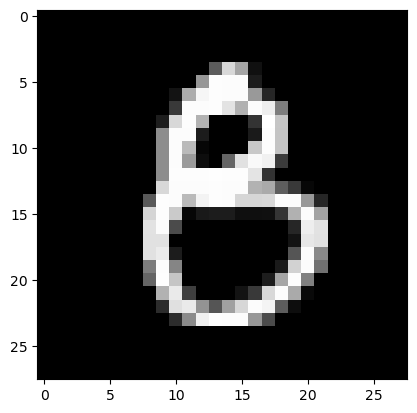

In [4]:
n = 800
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

### преобразование данных

In [5]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

### Нормальзация данных

In [6]:
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.astype('float32')
x_test = x_test/255

In [7]:
print(y_train_org[n])

9


### преобразование в one hot encoding

In [8]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [9]:
print(y_test[900])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### правильный ответ в OHE

In [10]:
print(y_train.shape)
print(y_train[n])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Создаем нейронную сеть

In [11]:
model = Sequential()

### добавляем слои нейронной сети

In [12]:
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Компилируем нейронную сеть

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


### Обучаем нейронную сеть

In [14]:
model.fit(x_train, y_train, batch_size=200, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
240/240 [==============================] - 2s 3ms/step - loss: 0.4136 - accuracy: 0.8836 - val_loss: 0.1902 - val_accuracy: 0.9476
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1668 - accuracy: 0.9511 - val_loss: 0.1393 - val_accuracy: 0.9578
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1175 - accuracy: 0.9649 - val_loss: 0.1205 - val_accuracy: 0.9644
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9738 - val_loss: 0.1126 - val_accuracy: 0.9656
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9784 - val_loss: 0.1003 - val_accuracy: 0.9690
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0912 - val_accuracy: 0.9733
Epoch 

### Проверка точности на тестовых данных

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9755


[0.1050138771533966, 0.9754999876022339]